In [1]:
#导入包
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#导入数据集
from sklearn import datasets
iris=datasets.load_iris()

In [8]:
len(iris.data)

150

In [15]:
#切分数据集
Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data,
                                                iris.target,
                                                random_state=42)


In [9]:
len(Xtrain)

112

In [10]:
len(Xtest)

38

In [16]:
#建模
clf = GaussianNB()
clf.fit(Xtrain, ytrain)

GaussianNB(priors=None)

In [17]:
#在测试集上执行预测，proba导出的是每个样本属于某类的概率
clf.predict(Xtest)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [18]:
clf.predict_proba(Xtest)

array([[5.97926853e-094, 9.95499546e-001, 4.50045384e-003],
       [1.00000000e+000, 1.52146968e-013, 1.07136902e-020],
       [1.71330808e-299, 6.04667826e-012, 1.00000000e+000],
       [2.88508207e-096, 9.76485329e-001, 2.35146713e-002],
       [1.36797133e-109, 8.51147229e-001, 1.48852771e-001],
       [1.00000000e+000, 4.74962788e-013, 4.28854236e-021],
       [3.25153316e-053, 9.99959350e-001, 4.06500520e-005],
       [1.09216160e-176, 1.05015117e-006, 9.99998950e-001],
       [3.27169186e-098, 9.93646597e-001, 6.35340277e-003],
       [1.17401351e-060, 9.99944993e-001, 5.50073382e-005],
       [1.00765817e-153, 5.02929583e-004, 9.99497070e-001],
       [1.00000000e+000, 7.95517827e-017, 5.80301835e-025],
       [1.00000000e+000, 1.83324108e-016, 2.96899989e-024],
       [1.00000000e+000, 1.81709952e-016, 2.19054140e-024],
       [1.00000000e+000, 2.58611124e-016, 6.24907433e-024],
       [4.90534771e-110, 5.45081346e-001, 4.54918654e-001],
       [3.16184825e-207, 5.32942939e-007

In [19]:
#测试准确率
accuracy_score(ytest, clf.predict(Xtest))

1.0

In [36]:
import numpy as np
import pandas as pd
import random

In [37]:
dataSet =pd.read_csv('iris.txt',header = None)
dataSet.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
def randSplit(dataSet, rate):
    l = list(dataSet.index) #提取出索引
    random.shuffle(l) #随机打乱索引
    dataSet.index = l #将打乱后的索引重新赋值给原数据集
    n = dataSet.shape[0] #总行数
    m = int(n * rate) #训练集的数量
    train = dataSet.loc[range(m), :] #提取前m个记录作为训练集
    test = dataSet.loc[range(m, n), :] #剩下的作为测试集
    dataSet.index = range(dataSet.shape[0]) #更新原数据集的索引
    test.index = range(test.shape[0]) #更新测试集的索引
    return train, test

In [39]:
train, test = randSplit(dataSet, 0.8)

In [40]:
train.head()

,0,1,2,3,4
0,6.1,2.8,4.7,1.2,Iris-versicolor
1,5.7,2.8,4.1,1.3,Iris-versicolor
2,7.4,2.8,6.1,1.9,Iris-virginica
3,5.8,2.7,5.1,1.9,Iris-virginica
4,5.8,4.0,1.2,0.2,Iris-setosa


In [41]:
test.head()

,0,1,2,3,4
0,6.1,2.9,4.7,1.4,Iris-versicolor
1,6.2,2.8,4.8,1.8,Iris-virginica
2,7.7,3.8,6.7,2.2,Iris-virginica
3,7.9,3.8,6.4,2.0,Iris-virginica
4,6.4,3.2,4.5,1.5,Iris-versicolor


In [42]:
def gnb_classify(train,test):
    labels = train.iloc[:,-1].value_counts().index #提取训练集的标签种类
    mean =[] #存放每个类别的均值
    std =[] #存放每个类别的方差
    result = [] #存放测试集的预测结果
    for i in labels:
        item = train.loc[train.iloc[:,-1]==i,:] #分别提取出每一种类别
        m = item.iloc[:,:-1].mean() #当前类别的平均值
#         s = np.sum((item.iloc[:,:-1]-m)**2)/(item.shape[0]) #当前类别的方差
        s = item.iloc[:,:-1].var()
        mean.append(m) #将当前类别的平均值追加至列表
        std.append(s) #将当前类别的方差追加至列表
    means = pd.DataFrame(mean,index=labels) #变成DF格式，索引为类标签
    stds = pd.DataFrame(std,index=labels) #变成DF格式，索引为类标签
    for j in range(test.shape[0]):
        iset = test.iloc[j,range(4)].tolist() #当前测试实例
        iprob = np.exp(-1*(iset-means)**2/(stds*2))/(np.sqrt(2*np.pi*stds)) #正态分布公式
        prob = 1 #初始化当前实例总概率
        for k in range(test.shape[1]-1): #遍历每个特征
            prob *= iprob[k] #特征概率之积即为当前实例概率
            cla = prob.index[np.argmax(prob.values)] #返回最大概率的类别
        result.append(cla)
    test['predict']=result
    acc = (test.iloc[:,-1]==test.iloc[:,-2]).mean() #计算预测准确率
    print(f'模型预测准确率为{acc}')
    return test

In [43]:
gnb_classify(train,test)

模型预测准确率为0.9333333333333333


,0,1,2,3,4,predict
0,6.1,2.9,4.7,1.4,Iris-versicolor,Iris-versicolor
1,6.2,2.8,4.8,1.8,Iris-virginica,Iris-virginica
2,7.7,3.8,6.7,2.2,Iris-virginica,Iris-virginica
3,7.9,3.8,6.4,2.0,Iris-virginica,Iris-virginica
4,6.4,3.2,4.5,1.5,Iris-versicolor,Iris-versicolor
5,4.4,3.2,1.3,0.2,Iris-setosa,Iris-setosa
6,5.9,3.2,4.8,1.8,Iris-versicolor,Iris-virginica
7,4.4,3.0,1.3,0.2,Iris-setosa,Iris-setosa
8,6.7,3.3,5.7,2.1,Iris-virginica,Iris-virginica
9,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica


In [52]:
for i in range(20):
    train,test= randSplit(dataSet, 0.8)
    gnb_classify(train,test)

模型预测准确率为0.9333333333333333
模型预测准确率为0.9666666666666667
模型预测准确率为1.0
模型预测准确率为0.9666666666666667
模型预测准确率为0.9
模型预测准确率为0.9666666666666667
模型预测准确率为1.0
模型预测准确率为0.9666666666666667
模型预测准确率为1.0
模型预测准确率为0.9666666666666667
模型预测准确率为0.9666666666666667
模型预测准确率为1.0
模型预测准确率为1.0
模型预测准确率为0.9666666666666667
模型预测准确率为0.9666666666666667
模型预测准确率为1.0
模型预测准确率为0.9333333333333333
模型预测准确率为0.9666666666666667
模型预测准确率为0.9333333333333333
模型预测准确率为0.9333333333333333


In [49]:
for j in range(test.shape[0]):
    iset = test.iloc[j,:-1].tolist() #当前测试实例
    iprob = np.exp(-1*(iset-means)**2/(stds*2))/(np.sqrt(2*np.pi*stds)) #正态分布公式
    prob = 1 #初始化当前实例总概率
    for k in range(test.shape[1]-1): #遍历每个特征
        prob *= iprob[k] #特征概率之积即为当前实例概率
        cla = prob.index[np.argmax(prob.values)] #返回最大概率的类别
    result.append(cla)

In [50]:
result

['Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica']

In [38]:
labels = train.iloc[:,-1].value_counts().index #提取训练集的标签种类
mean =[] #存放每个类别的均值
std =[] #存放每个类别的方差
result = [] #存放测试集的预测结果

In [39]:
labels

Index(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype='object')

In [41]:
i= labels[0]
i

'Iris-virginica'

In [42]:
item = train.loc[train.iloc[:,-1]==i,:]
item

,0,1,2,3,4
1,5.6,2.8,4.9,2.0,Iris-virginica
2,6.5,3.2,5.1,2.0,Iris-virginica
4,6.5,3.0,5.8,2.2,Iris-virginica
7,6.4,3.2,5.3,2.3,Iris-virginica
10,6.4,3.1,5.5,1.8,Iris-virginica
15,5.7,2.5,5.0,2.0,Iris-virginica
18,6.8,3.0,5.5,2.1,Iris-virginica
27,6.3,2.9,5.6,1.8,Iris-virginica
28,7.7,2.6,6.9,2.3,Iris-virginica
33,7.2,3.0,5.8,1.6,Iris-virginica


In [2]:
def loadDataSet():
    dataSet=[['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
             ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
             ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
             ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
             ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
             ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']] #切分好的词条
    classVec = [0,1,0,1,0,1] #类别标签向量，1代表侮辱性词汇，0代表非侮辱性词汇
    return dataSet,classVec

In [3]:
dataSet,classVec = loadDataSet()

In [4]:
dataSet

[['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
 ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
 ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
 ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
 ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
 ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]

In [5]:
classVec

[0, 1, 0, 1, 0, 1]

In [6]:
def createVocabList(dataSet):
    vocabSet = set() #创建一个空的集合
    for doc in dataSet: #遍历dataSet中的每一条言论
        vocabSet = vocabSet | set(doc) #取并集
        vocabList = list(vocabSet)
    return vocabList

In [7]:
vocabList = createVocabList(dataSet)

In [8]:
print(vocabList)

['my', 'licks', 'has', 'I', 'cute', 'worthless', 'maybe', 'posting', 'steak', 'dog', 'so', 'mr', 'food', 'park', 'problems', 'dalmation', 'ate', 'how', 'buying', 'quit', 'flea', 'to', 'garbage', 'take', 'is', 'help', 'stupid', 'stop', 'please', 'love', 'not', 'him']


In [9]:
def setOfWords2Vec(vocabList, inputSet):
    returnVec = [0] * len(vocabList) #创建一个其中所含元素都为0的向量
    for word in inputSet: #遍历每个词条
        if word in vocabList: #如果词条存在于词汇表中，则变为1
            returnVec[vocabList.index(word)] = 1
        else:
            print(f" {word} is not in my Vocabulary!" )
    return returnVec #返回文档向量

In [10]:
def get_trainMat(dataSet):
    trainMat = [] #初始化向量列表
    vocabList = createVocabList(dataSet) #生成词汇表
    for inputSet in dataSet: #遍历样本词条中的每一条样本
        returnVec=setOfWords2Vec(vocabList, inputSet) #将当前词条向量化
        trainMat.append(returnVec) #追加到向量列表中
    return trainMat

In [11]:
trainMat = get_trainMat(dataSet)

In [12]:
print(trainMat)

[[1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1], [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]]


In [15]:
def trainNB(trainMat,classVec):
    import numpy as np
    n = len(trainMat) #计算训练的文档数目
    m = len(trainMat[0]) #计算每篇文档的词条数
    pAb = sum(classVec)/n #文档属于侮辱类的概率
    p0Num = np.zeros(m) #词条出现数初始化为0
    p1Num = np.zeros(m) #词条出现数初始化为0
    p0Denom = 0 #分母初始化为0
    p1Denom = 0 #分母初始化为0
    for i in range(n): #遍历每一个文档
        if classVec[i] == 1:      #统计属于侮辱类的条件概率所需的数据
            p1Num += trainMat[i]
            p1Denom += sum(trainMat[i])
        else: #统计属于非侮辱类的条件概率所需的数据
            p0Num += trainMat[i]
            p0Denom += sum(trainMat[i])
    p1V = p1Num/p1Denom
    p0V = p0Num/p0Denom
    return p0V,p1V,pAb #返回属于非侮辱类,侮辱类和文档属于侮辱类的概率

In [16]:
p0V,p1V,pAb = trainNB(trainMat,classVec)

In [18]:
p0V

array([0.125     , 0.04166667, 0.04166667, 0.04166667, 0.04166667,
       0.        , 0.        , 0.        , 0.04166667, 0.04166667,
       0.04166667, 0.04166667, 0.        , 0.        , 0.04166667,
       0.04166667, 0.04166667, 0.04166667, 0.        , 0.        ,
       0.04166667, 0.04166667, 0.        , 0.        , 0.04166667,
       0.04166667, 0.        , 0.04166667, 0.04166667, 0.04166667,
       0.        , 0.08333333])

In [19]:
p1V

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.10526316, 0.05263158, 0.05263158, 0.        , 0.10526316,
       0.        , 0.        , 0.05263158, 0.05263158, 0.        ,
       0.        , 0.        , 0.        , 0.05263158, 0.05263158,
       0.        , 0.05263158, 0.05263158, 0.05263158, 0.        ,
       0.        , 0.15789474, 0.05263158, 0.        , 0.        ,
       0.05263158, 0.05263158])

In [20]:
pAb

0.5

In [87]:
from functools import reduce

In [89]:
def classifyNB(vec2Classify, p0V, p1V, pAb):
    p1 = reduce(lambda x,y:x*y, vec2Classify * p1V) * pAb       #对应元素相乘
    p0 = reduce(lambda x,y:x*y, vec2Classify * p0V) * (1 - pAb)
    print('p0:',p0)
    print('p1:',p1)
    if p1 > p0:
        return 1
    else:
        return 0

In [90]:
def testingNB(testVec):
    dataSet,classVec = loadDataSet() #创建实验样本
    vocabList = createVocabList(dataSet) #创建词汇表
    trainMat= get_trainMat(dataSet) #将实验样本向量化
    p0V,p1V,pAb = trainNB(trainMat,classVec) #训练朴素贝叶斯分类器
    thisone = setOfWords2Vec(vocabList, testVec) #测试样本向量化
    if classifyNB(thisone,p0V,p1V,pAb)==1:
        print(testVec,'属于侮辱类') #执行分类并打印分类结果
    else:
        print(testVec,'属于非侮辱类') #执行分类并打印分类结果

In [91]:
#测试样本1
testVec1 = ['love', 'my', 'dalmation']
testingNB(testVec1)

p0: 0.0
p1: 0.0
['love', 'my', 'dalmation'] 属于非侮辱类


In [92]:
#测试样本2
testVec2 = ['stupid', 'garbage']
testingNB(testVec2)

p0: 0.0
p1: 0.0
['stupid', 'garbage'] 属于非侮辱类


In [93]:
def trainNB(trainMat,classVec):
    n = len(trainMat) #计算训练的文档数目
    m = len(trainMat[0]) #计算每篇文档的词条数
    pAb = sum(classVec)/n #文档属于侮辱类的概率
    p0Num = np.ones(m) #词条出现数初始化为1
    p1Num = np.ones(m) #词条出现数初始化为1
    p0Denom = 2 #分母初始化为2
    p1Denom = 2 #分母初始化为2
    for i in range(n): #遍历每一个文档
        if classVec[i] == 1: #统计属于侮辱类的条件概率所需的数据
            p1Num += trainMat[i]
            p1Denom += sum(trainMat[i])
        else: #统计属于非侮辱类的条件概率所需的数据
            p0Num += trainMat[i]
            p0Denom += sum(trainMat[i])
    p1V = np.log(p1Num/p1Denom)
    p0V = np.log(p0Num/p0Denom)
    return p0V,p1V,pAb #返回属于非侮辱类,侮辱类和文档属于侮辱类的概率

In [94]:
p0V,p1V,pAb = trainNB(trainMat,classVec)

In [95]:
p0V

array([-3.25809654, -3.25809654, -3.25809654, -2.56494936, -2.56494936,
       -3.25809654, -3.25809654, -3.25809654, -2.56494936, -2.56494936,
       -2.56494936, -2.56494936, -2.56494936, -1.87180218, -2.56494936,
       -3.25809654, -2.56494936, -2.56494936, -2.56494936, -2.56494936,
       -2.56494936, -3.25809654, -3.25809654, -2.56494936, -2.56494936,
       -2.56494936, -2.15948425, -2.56494936, -3.25809654, -2.56494936,
       -3.25809654, -2.56494936])

In [96]:
p1V

array([-2.35137526, -2.35137526, -2.35137526, -3.04452244, -3.04452244,
       -1.65822808, -2.35137526, -2.35137526, -3.04452244, -3.04452244,
       -2.35137526, -3.04452244, -3.04452244, -3.04452244, -3.04452244,
       -2.35137526, -3.04452244, -3.04452244, -3.04452244, -1.94591015,
       -3.04452244, -2.35137526, -2.35137526, -3.04452244, -3.04452244,
       -3.04452244, -2.35137526, -2.35137526, -1.94591015, -3.04452244,
       -2.35137526, -3.04452244])

In [97]:
pAb

0.5

In [98]:
def classifyNB(vec2Classify, p0V, p1V, pAb):
    p1 = sum(vec2Classify * p1V) + np.log(pAb)    #对应元素相乘
    p0 = sum(vec2Classify * p0V) + np.log(1- pAb) #对应元素相乘
    if p1 > p0:
        return 1
    else:
        return 0

In [99]:
#测试样本1
testVec1 = ['love', 'my', 'dalmation']
testingNB(testVec1)

['love', 'my', 'dalmation'] 属于非侮辱类


In [100]:
#测试样本2
testVec2 = ['stupid', 'garbage']
testingNB(testVec2)

['stupid', 'garbage'] 属于侮辱类


In [117]:
def get_dataSet():
    ham = []
    #ham目录下的25个都读取
    for i in range(1,26):
        file_path = 'email/ham/%d.txt'%(i)
        # print(file_path)
        data = open(file_path,encoding='gbk',errors='ignore').read()
        ham.append([data,'ham'])
    df1 = pd.DataFrame(ham)
    spam = []
    #spam目录下的25个都读取
    for i in range(1,26):
        file_path = 'email/spam/%d.txt'%(i)
        # print(file_path)
        data = open(file_path,encoding='gbk',errors='ignore').read()
        spam.append([data,'spam'])
    df2 = pd.DataFrame(spam)
    dataSet = pd.concat([df1,df2],ignore_index=True) #合并垃圾邮件和非垃圾邮件
    return dataSet

In [102]:
file_path = 'email/ham/%d.txt'%(1)

In [103]:
file_path

'email/ham/1.txt'

In [104]:
data = open(file_path,encoding='gbk',errors='ignore').read()
data

'Hi Peter,\n\nWith Jose out of town, do you want to\nmeet once in a while to keep things\ngoing and do some interesting stuff?\n\nLet me know\nEugene'

In [105]:
ham=[]
ham.append([data,'ham'])

In [106]:
ham

[['Hi Peter,\n\nWith Jose out of town, do you want to\nmeet once in a while to keep things\ngoing and do some interesting stuff?\n\nLet me know\nEugene',
  'ham']]

In [112]:
ham=[]
for i in range(1,26):
    file_path = 'email/ham/%d.txt'%(i)
    # print(file_path)
    data = open(file_path,encoding='gbk',errors='ignore').read()
    ham.append([data,'ham'])

In [113]:
df1 = pd.DataFrame(ham)
df1

,0,1
0,"Hi Peter,\n\nWith Jose out of town, do you wan...",ham
1,Yay to you both doing fine!\n\nI'm working on ...,ham
2,WHat is going on there?\nI talked to John on e...,ham
3,Yo. I've been working on my running website. ...,ham
4,There was a guy at the gas station who told me...,ham
5,"Hello,\n\nSince you are an owner of at least o...",ham
6,Zach Hamm commented on your status.\n\nZach wr...,ham
7,This e-mail was sent from a notification-only ...,ham
8,"Hi Peter,\n\nThese are the only good scenic on...",ham
9,Ryan Whybrew commented on your status.\n\nRyan...,ham


In [110]:
spam = []
#spam目录下的25个都读取
for i in range(1,26):
    file_path = 'email/spam/%d.txt'%(i)
    # print(file_path)
    data = open(file_path,encoding='gbk',errors='ignore').read()
    spam.append([data,'spam'])
df2 = pd.DataFrame(spam)

In [111]:
df2

,0,1
0,--- Codeine 15mg -- 30 for $203.70 -- VISA Onl...,spam
1,Hydrocodone/Vicodin ES/Brand Watson\n\nVicodin...,spam
2,You Have Everything To Gain!\n\nIncredib1e gai...,spam
3,Percocet 10/625 mg withoutPrescription 30 tabs...,spam
4,--- Codeine 15mg -- 30 for $203.70 -- VISA Onl...,spam
5,OEM Adobe & Microsoft softwares\nFast order an...,spam
6,Bargains Here! Buy Phentermin 37.5 mg (K-25)\n...,spam
7,You Have Everything To Gain!\n\nIncredib1e gai...,spam
8,Bargains Here! Buy Phentermin 37.5 mg (K-25)\n...,spam
9,OrderCializViagra Online & Save 75-90%\n\n0nli...,spam


In [116]:
dataSet = pd.concat([df1,df2],ignore_index=True) 
dataSet

,0,1
0,"Hi Peter,\n\nWith Jose out of town, do you wan...",ham
1,Yay to you both doing fine!\n\nI'm working on ...,ham
2,WHat is going on there?\nI talked to John on e...,ham
3,Yo. I've been working on my running website. ...,ham
4,There was a guy at the gas station who told me...,ham
5,"Hello,\n\nSince you are an owner of at least o...",ham
6,Zach Hamm commented on your status.\n\nZach wr...,ham
7,This e-mail was sent from a notification-only ...,ham
8,"Hi Peter,\n\nThese are the only good scenic on...",ham
9,Ryan Whybrew commented on your status.\n\nRyan...,ham


In [118]:
dataSet=get_dataSet()

In [120]:
dataSet.head()

,0,1
0,"Hi Peter,\n\nWith Jose out of town, do you wan...",ham
1,Yay to you both doing fine!\n\nI'm working on ...,ham
2,WHat is going on there?\nI talked to John on e...,ham
3,Yo. I've been working on my running website. ...,ham
4,There was a guy at the gas station who told me...,ham


In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [122]:
tf = TfidfVectorizer() #用来抽取文章的特征
tf.fit(dataSet[0]) #对所有内容进行学习
data_tf = tf.transform(dataSet[0]) #对学习的内容进行特征抽取
#data_tf = tf.fit_transform(dataSet[0]) #训练和转换可以同时进行

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data_tf,dataSet[1],test_size=0.2)

In [129]:
Xtrain.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.14138273, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.43716362, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [125]:
Xtest.shape[0]

10

In [126]:
Ytest

42    spam
10     ham
18     ham
36    spam
9      ham
19     ham
33    spam
45    spam
32    spam
43    spam
Name: 1, dtype: object

In [130]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [131]:
#多项式分布朴素贝叶斯
mnb = MultinomialNB() #获取模型
mnb.fit(Xtrain,Ytrain) #训练模型
mnb.score(Xtest,Ytest) #查看准确率

1.0

In [132]:
#伯努利分布朴素贝叶斯
bnb = BernoulliNB()
bnb.fit(Xtrain,Ytrain)
bnb.score(Xtest,Ytest)

1.0

In [135]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['Simhei'] #显示中文

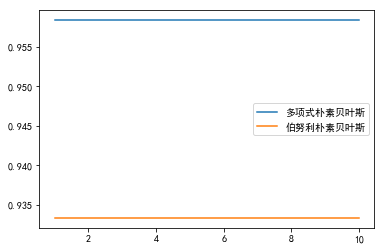

In [136]:
mnbs=[]
bnbs=[]
for i in range(10):
    mnb = MultinomialNB()
    mnb_s = cross_val_score(mnb,data_tf,dataSet[1],cv=10).mean()
    mnbs.append(mnb_s)
    bnb = BernoulliNB()
    bnb_s = cross_val_score(bnb,data_tf,dataSet[1],cv=10).mean()
    bnbs.append(bnb_s)
plt.plot(range(1,11),mnbs,label = "多项式朴素贝叶斯")
plt.plot(range(1,11),bnbs,label = "伯努利朴素贝叶斯")
plt.legend()
plt.show()

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [3]:
train = pd.read_csv('Kaggle/train.csv',parse_dates = ['Dates'])
test = pd.read_csv('Kaggle/test.csv',parse_dates = ['Dates'],index_col=0)

In [4]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [5]:
train.shape

(878049, 9)

In [6]:
test.head()

,Dates,DayOfWeek,PdDistrict,Address,X,Y
Id,,,,,,
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [7]:
test.shape

(884262, 6)

In [148]:
len(train.loc[:,'Category'].value_counts().index)

39

In [149]:
#对犯罪类别:Category; 用LabelEncoder进行编号
leCrime = LabelEncoder()
crime = leCrime.fit_transform(train.Category) #39种犯罪类型

In [150]:
crime

array([37, 21, 21, ..., 16, 35, 12], dtype=int64)

In [152]:
#用get_dummies因子化星期几、街区、小时等特征
days=pd.get_dummies(train.DayOfWeek)
days.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [154]:
district = pd.get_dummies(train.PdDistrict)
district.head()

,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0


In [156]:
hour = train.Dates.dt.hour
hour = pd.get_dummies(hour)
hour.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [158]:
#组合特征形成训练集
trainData = pd.concat([hour, days, district], axis = 1) #将特征进行左右拼接
trainData['crime'] = crime #追加标签列
trainData.head()

,0,1,2,3,4,5,6,7,8,9,...,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN,crime
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,37
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,21
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,21
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,16
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,16


In [159]:
#得到测试集
days = pd.get_dummies(test.DayOfWeek)
district = pd.get_dummies(test.PdDistrict)
hour = test.Dates.dt.hour
hour = pd.get_dummies(hour)
testData = pd.concat([hour, days, district], axis=1)
testData.head()

,0,1,2,3,4,5,6,7,8,9,...,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
Id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [160]:
#切分数据集
X_train, X_test, y_train, y_test = train_test_split(trainData.iloc[:,:-1],
                                                    trainData.iloc[:,-1],
                                                    test_size=0.2)

In [161]:
#训练模型
BNB = BernoulliNB()
BNB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [162]:
#计算损失函数
propa = BNB.predict_proba(X_test)

In [163]:
logLoss=log_loss(y_test, propa)
logLoss

2.584164214879397

In [164]:
#使用模型预测testData
BNB.predict(testData)

array([21, 21, 16, ..., 21, 21, 21], dtype=int64)